<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning3/blob/master/notebook/chap10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 57.4 MB/s eta 0:00:00


# 第10章 アンサンブル学習



アンサンブル学習で、Breast Cancerデータの識別を行います。Breast Cancerデータは腫瘍の画像から取り出した半径や周囲の値の平均・標準偏差・最大値などを特徴とし、その腫瘍が悪性(malignant)か良性(benign)かという正解が付いたデータです。

ライブラリの読み込み

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

breast_cancerデータを読み込んでX, yに格納後、概要を表示します。

In [3]:
bc = load_breast_cancer(as_frame=True)
X = bc.data
y = bc.target
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y.head(n=25).to_list()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]

## 例題10.1 バギング

base_estimator引数で識別器を指定します。指定しない場合は決定木になります。

In [8]:
clf1 = BaggingClassifier(n_estimators=3, random_state=2)

弱識別器を作成し、決定木の根に近い部分を表示します。比較的似ている決定木になっていることがわかります。

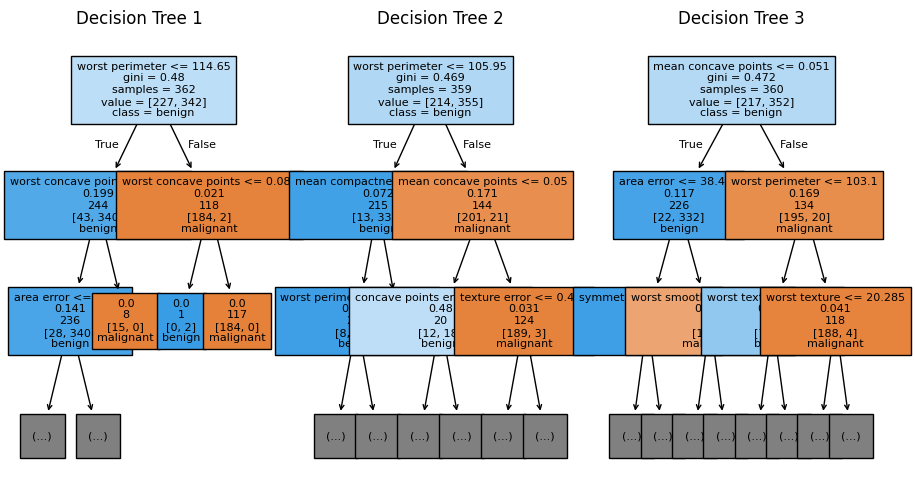

In [9]:
clf1.fit(X, y)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 6))
for i in range(3):
    plot_tree(clf1.estimators_[i], ax=axes[i], fontsize=8, filled=True,
              max_depth=2, label='root', feature_names=bc.feature_names,
              class_names=bc.target_names)
    axes[i].set_title(f"Decision Tree {i+1}")
plt.savefig('s.svg', format='svg', bbox_inches='tight')
plt.show()

交差確認法で評価します。

In [10]:
clf1 = BaggingClassifier(random_state=2)
scores = cross_val_score(clf1, X, y, cv=10)
print(f'Accuracy: {scores.mean():0.2f} (+/- {scores.std()*2:0.2f})')

Accuracy: 0.95 (+/- 0.07)


## 例題10.2 ランダムフォレスト

In [11]:
clf2 = RandomForestClassifier(n_estimators=3, random_state=2)

弱識別器として作成された決定木の根に近い部分を表示します。バギングと比べるとある程度異なった決定木になっていることがわかります。

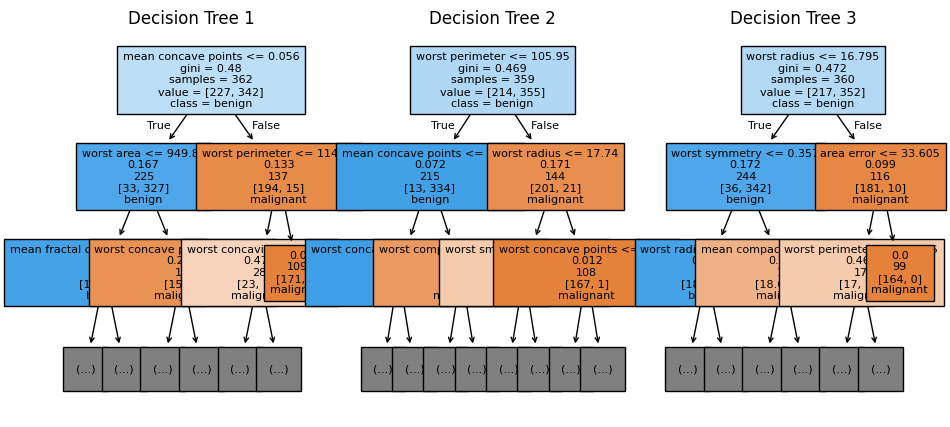

In [12]:
clf2.fit(X, y)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 5))
for i in range(3):
    plot_tree(clf2.estimators_[i], ax=axes[i], fontsize=8, filled=True,
              max_depth=2, label='root', feature_names=bc.feature_names,
              class_names=bc.target_names)
    axes[i].set_title(f"Decision Tree {i+1}")
plt.savefig('s.svg', format='svg', bbox_inches='tight')
plt.show()

交差確認法で評価します。

In [13]:
clf2 = RandomForestClassifier(random_state=2)
scores = cross_val_score(clf2, X, y, cv=10)
print(f'Accuracy: {scores.mean():0.2f} (+/- {scores.std()*2:0.2f})')

Accuracy: 0.96 (+/- 0.08)


## 例題10.3 AdaBoost

In [14]:
clf3 = AdaBoostClassifier()

Adaブーストの弱識別器のデフォルトは深さ1の決定木です。先頭の5個を確認すると、すべて異なる特徴が選ばれています。

In [15]:
clf3.fit(X, y)
for t in clf3.estimators_[:5]:
    print(export_text(t, feature_names=bc.feature_names,
                      class_names=bc.target_names))

|--- worst radius <= 16.80
|   |--- class: benign
|--- worst radius >  16.80
|   |--- class: malignant

|--- worst concave points <= 0.14
|   |--- class: benign
|--- worst concave points >  0.14
|   |--- class: malignant

|--- worst texture <= 23.35
|   |--- class: benign
|--- worst texture >  23.35
|   |--- class: malignant

|--- area error <= 34.40
|   |--- class: benign
|--- area error >  34.40
|   |--- class: malignant

|--- worst concavity <= 0.21
|   |--- class: benign
|--- worst concavity >  0.21
|   |--- class: malignant



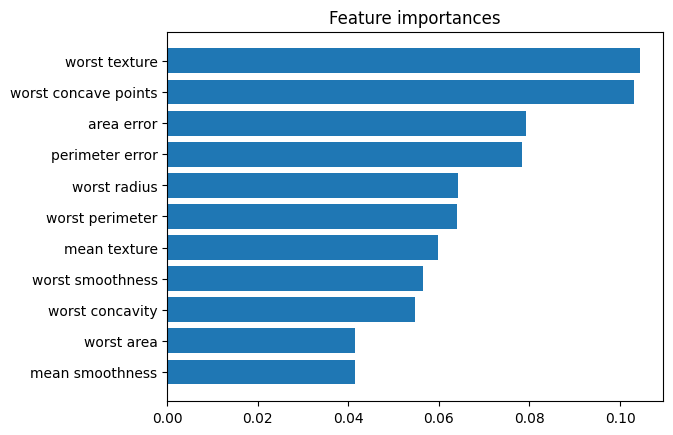

In [16]:
importances = clf3.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature importances")
plt.barh(bc.feature_names[indices[10::-1]], importances[indices[10::-1]])
plt.savefig('s.svg', format='svg', bbox_inches='tight')
plt.show()

交差確認法で評価します。

In [17]:
clf3 = AdaBoostClassifier(random_state=2)
scores = cross_val_score(clf3, X, y, cv=10)
print(f'Accuracy: {scores.mean():0.2f} (+/- {scores.std()*2:0.2f})')

Accuracy: 0.97 (+/- 0.05)


## 勾配ブースティング

2次曲線にノイズをのせたデータに対する回帰で説明

In [18]:
np.random.seed(2)
X = np.linspace(-1, 1, 100)
y = X**2 + np.random.normal(0, 0.1, len(X))

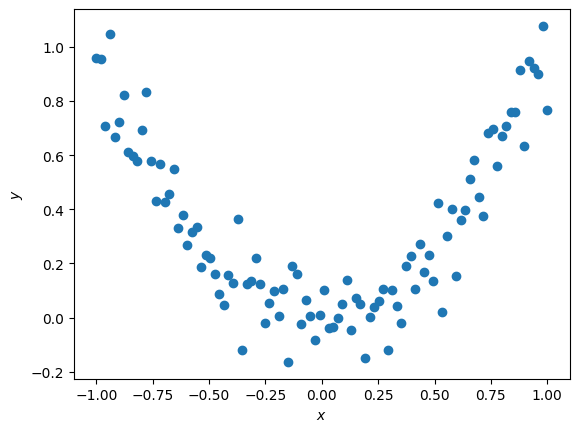

In [19]:
plt.scatter(X, y)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.savefig('s1.svg', format='svg', bbox_inches='tight')
plt.show()

In [20]:
def reg_plot(X, y, reg):
    # 散布図をプロット
    plt.scatter(X, y, label="Data")

    # reg の予測値をプロット
    X_pred = np.linspace(-1, 1, 100).reshape(-1, 1)
    y_pred = reg.predict(X_pred)
    plt.plot(X_pred, y_pred, color="red", label="Estimator")

    # グラフの設定
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.ylim(-0.4, 1.2)
    plt.legend()
    plt.savefig('fig10-.svg', format='svg', bbox_inches='tight')
    plt.show()

In [21]:
tree_reg1 = DecisionTreeRegressor(max_depth=3, random_state=2)
tree_reg1.fit(X.reshape(-1, 1), y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


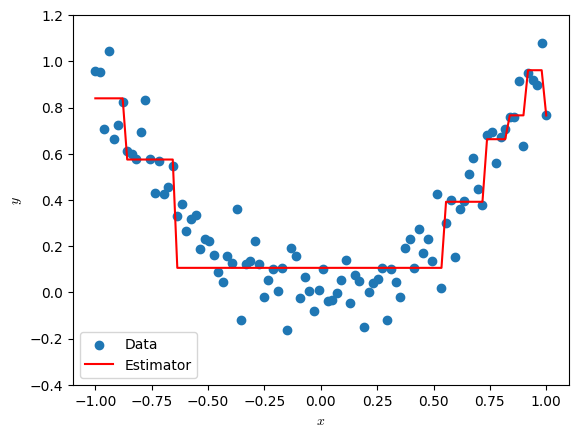

In [22]:
reg_plot(X, y, tree_reg1)

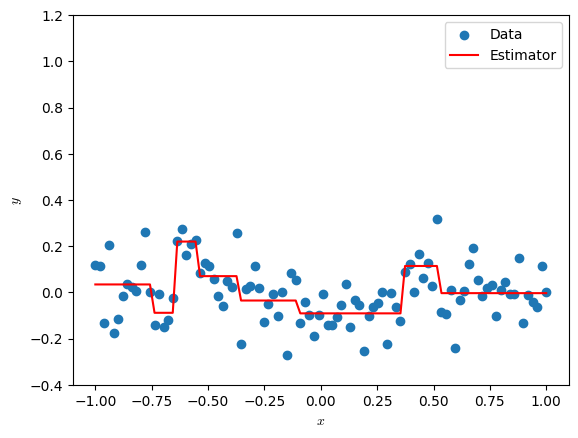

In [23]:
y2 = y - tree_reg1.predict(X.reshape(-1, 1))
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=2)
tree_reg2.fit(X.reshape(-1, 1), y2)
reg_plot(X, y2, tree_reg2)

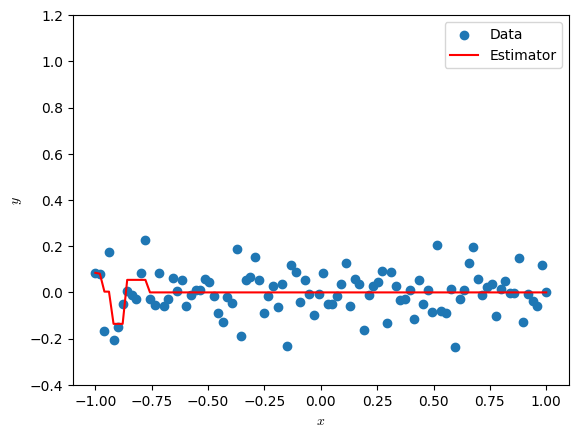

In [24]:
y3 = y2 - tree_reg2.predict(X.reshape(-1, 1))
tree_reg3 = DecisionTreeRegressor(max_depth=3, random_state=2)
tree_reg3.fit(X.reshape(-1, 1), y3)
reg_plot(X, y3, tree_reg3)

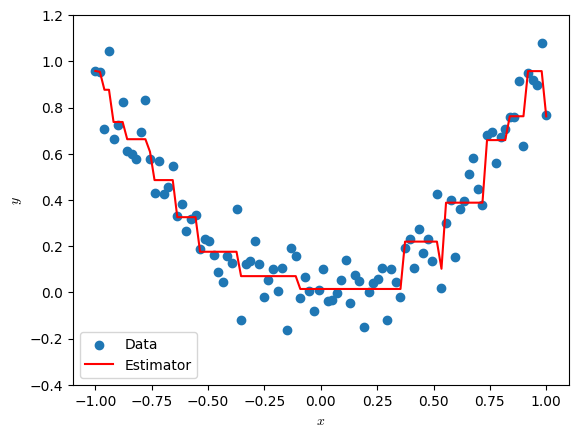

In [25]:
class FinalRegressor:
    def predict(x):
        return tree_reg1.predict(x) + tree_reg2.predict(x) + tree_reg3.predict(x)

reg_plot(X, y, FinalRegressor)

 GradientBoostingRegressor を用いた回帰

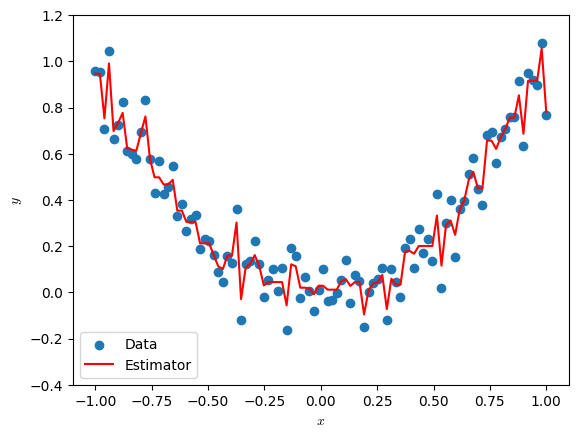

In [26]:
clf4 = GradientBoostingRegressor()
clf4.fit(X.reshape(-1, 1), y)
reg_plot(X, y, clf4)

## 演習問題

10.1 `GradientBoostingClassifier` を用いて，Breast Cancer データに対して識別を行え．

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer # Reload breast_cancer data

# Reload breast_cancer data
bc = load_breast_cancer(as_frame=True)
X = bc.data
y = bc.target

clf4 = GradientBoostingClassifier(random_state=2)
scores = cross_val_score(clf4, X, y, cv=10)
print(f'Accuracy: {scores.mean():0.2f} (+/- {scores.std()*2:0.2f})')

Accuracy: 0.96 (+/- 0.05)
